
Personal Finance Manager
1. Register
2. Login
3. Exit
Choose an option: 1
Enter your name: daks
Enter your email: daks@gmail.com
Enter your password: gfjs
User registered successfully!

Personal Finance Manager
1. Register
2. Login
3. Exit
Choose an option: 2
Enter your email: daks@gmail.com
Enter your password: gfjs
Login successful!

Dashboard
1. Add Transaction
2. View Transactions
3. Add Category
4. View Categories
5. Add Savings Goal
6. View Savings Goals
7. Generate Report
8. Logout
Choose an option: 1
Enter amount: 10000
Enter date (YYYY-MM-DD): 2025-01-27
Enter category: education
Enter description: fees
Transaction added successfully!

Dashboard
1. Add Transaction
2. View Transactions
3. Add Category
4. View Categories
5. Add Savings Goal
6. View Savings Goals
7. Generate Report
8. Logout
Choose an option: 2
(1, 2, 10000.0, '2025-01-27', 'education', 'fees')

Dashboard
1. Add Transaction
2. View Transactions
3. Add Category
4. View Categories
5. Add Savings Goal
6. View Savin

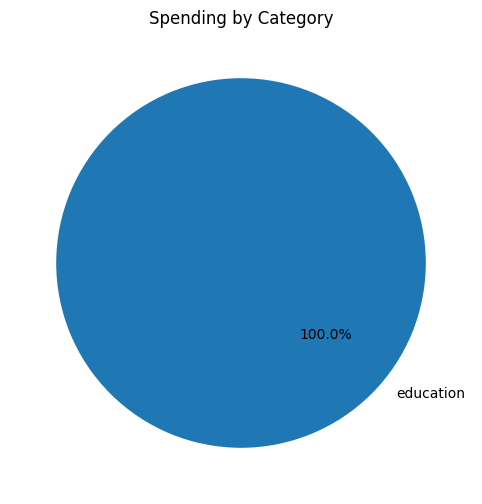


Dashboard
1. Add Transaction
2. View Transactions
3. Add Category
4. View Categories
5. Add Savings Goal
6. View Savings Goals
7. Generate Report
8. Logout
Choose an option: 8
Logging out...

Personal Finance Manager
1. Register
2. Login
3. Exit
Choose an option: 3
Goodbye!


In [2]:
import sqlite3
import os
from datetime import datetime
import matplotlib.pyplot as plt

# Database Setup
DB_FILE = "finance_manager.db"

def initialize_database():
    conn = sqlite3.connect(DB_FILE)
    cursor = conn.cursor()

    # Users Table
    cursor.execute('''
        CREATE TABLE IF NOT EXISTS users (
            id INTEGER PRIMARY KEY AUTOINCREMENT,
            name TEXT NOT NULL,
            email TEXT UNIQUE NOT NULL,
            password TEXT NOT NULL
        )
    ''')

    # Transactions Table
    cursor.execute('''
        CREATE TABLE IF NOT EXISTS transactions (
            id INTEGER PRIMARY KEY AUTOINCREMENT,
            user_id INTEGER NOT NULL,
            amount REAL NOT NULL,
            date TEXT NOT NULL,
            category TEXT NOT NULL,
            description TEXT,
            FOREIGN KEY (user_id) REFERENCES users (id)
        )
    ''')

    # Categories Table
    cursor.execute('''
        CREATE TABLE IF NOT EXISTS categories (
            id INTEGER PRIMARY KEY AUTOINCREMENT,
            user_id INTEGER NOT NULL,
            name TEXT NOT NULL UNIQUE,
            FOREIGN KEY (user_id) REFERENCES users (id)
        )
    ''')

    # Savings Goals Table
    cursor.execute('''
        CREATE TABLE IF NOT EXISTS savings_goals (
            id INTEGER PRIMARY KEY AUTOINCREMENT,
            user_id INTEGER NOT NULL,
            target_amount REAL NOT NULL,
            target_date TEXT NOT NULL,
            FOREIGN KEY (user_id) REFERENCES users (id)
        )
    ''')

    conn.commit()
    conn.close()

# User Management
class UserManager:
    def __init__(self):
        self.conn = sqlite3.connect(DB_FILE)

    def register_user(self, name, email, password):
        try:
            cursor = self.conn.cursor()
            cursor.execute("INSERT INTO users (name, email, password) VALUES (?, ?, ?)", (name, email, password))
            self.conn.commit()
            print("User registered successfully!")
        except sqlite3.IntegrityError:
            print("Error: Email already exists.")

    def login(self, email, password):
        cursor = self.conn.cursor()
        cursor.execute("SELECT id FROM users WHERE email = ? AND password = ?", (email, password))
        user = cursor.fetchone()
        if user:
            print("Login successful!")
            return user[0]
        else:
            print("Invalid email or password.")
            return None

# Transaction Management
class TransactionManager:
    def __init__(self, user_id):
        self.conn = sqlite3.connect(DB_FILE)
        self.user_id = user_id

    def add_transaction(self, amount, date, category, description):
        cursor = self.conn.cursor()
        cursor.execute(
            "INSERT INTO transactions (user_id, amount, date, category, description) VALUES (?, ?, ?, ?, ?)",
            (self.user_id, amount, date, category, description),
        )
        self.conn.commit()
        print("Transaction added successfully!")

    def view_transactions(self):
        cursor = self.conn.cursor()
        cursor.execute("SELECT * FROM transactions WHERE user_id = ?", (self.user_id,))
        transactions = cursor.fetchall()
        for txn in transactions:
            print(txn)

# Category Management
class CategoryManager:
    def __init__(self, user_id):
        self.conn = sqlite3.connect(DB_FILE)
        self.user_id = user_id

    def add_category(self, name):
        cursor = self.conn.cursor()
        try:
            cursor.execute("INSERT INTO categories (user_id, name) VALUES (?, ?)", (self.user_id, name))
            self.conn.commit()
            print("Category added successfully!")
        except sqlite3.IntegrityError:
            print("Category already exists.")

    def view_categories(self):
        cursor = self.conn.cursor()
        cursor.execute("SELECT name FROM categories WHERE user_id = ?", (self.user_id,))
        categories = cursor.fetchall()
        for category in categories:
            print(category[0])

# Savings Goals Management
class SavingsGoalManager:
    def __init__(self, user_id):
        self.conn = sqlite3.connect(DB_FILE)
        self.user_id = user_id

    def add_savings_goal(self, target_amount, target_date):
        cursor = self.conn.cursor()
        cursor.execute(
            "INSERT INTO savings_goals (user_id, target_amount, target_date) VALUES (?, ?, ?)",
            (self.user_id, target_amount, target_date),
        )
        self.conn.commit()
        print("Savings goal added successfully!")

    def view_savings_goals(self):
        cursor = self.conn.cursor()
        cursor.execute("SELECT target_amount, target_date FROM savings_goals WHERE user_id = ?", (self.user_id,))
        goals = cursor.fetchall()
        for goal in goals:
            print(f"Target Amount: {goal[0]}, Target Date: {goal[1]}")

# Report Generation
class ReportGenerator:
    def __init__(self, user_id):
        self.conn = sqlite3.connect(DB_FILE)
        self.user_id = user_id

    def generate_report(self):
        cursor = self.conn.cursor()
        cursor.execute(
            "SELECT category, SUM(amount) FROM transactions WHERE user_id = ? GROUP BY category",
            (self.user_id,),
        )
        data = cursor.fetchall()

        categories = [row[0] for row in data]
        amounts = [row[1] for row in data]

        plt.figure(figsize=(8, 6))
        plt.pie(amounts, labels=categories, autopct="%1.1f%%", startangle=140)
        plt.title("Spending by Category")
        plt.show()

# Main Menu
class FinanceManager:
    def __init__(self):
        initialize_database()
        self.user_manager = UserManager()
        self.current_user_id = None

    def main_menu(self):
        while True:
            print("\nPersonal Finance Manager")
            print("1. Register")
            print("2. Login")
            print("3. Exit")
            choice = input("Choose an option: ")

            if choice == "1":
                name = input("Enter your name: ")
                email = input("Enter your email: ")
                password = input("Enter your password: ")
                self.user_manager.register_user(name, email, password)
            elif choice == "2":
                email = input("Enter your email: ")
                password = input("Enter your password: ")
                user_id = self.user_manager.login(email, password)
                if user_id:
                    self.current_user_id = user_id
                    self.user_dashboard()
            elif choice == "3":
                print("Goodbye!")
                break
            else:
                print("Invalid option. Please try again.")

    def user_dashboard(self):
        transaction_manager = TransactionManager(self.current_user_id)
        category_manager = CategoryManager(self.current_user_id)
        savings_goal_manager = SavingsGoalManager(self.current_user_id)
        report_generator = ReportGenerator(self.current_user_id)

        while True:
            print("\nDashboard")
            print("1. Add Transaction")
            print("2. View Transactions")
            print("3. Add Category")
            print("4. View Categories")
            print("5. Add Savings Goal")
            print("6. View Savings Goals")
            print("7. Generate Report")
            print("8. Logout")
            choice = input("Choose an option: ")

            if choice == "1":
                amount = float(input("Enter amount: "))
                date = input("Enter date (YYYY-MM-DD): ")
                category = input("Enter category: ")
                description = input("Enter description: ")
                transaction_manager.add_transaction(amount, date, category, description)
            elif choice == "2":
                transaction_manager.view_transactions()
            elif choice == "3":
                name = input("Enter category name: ")
                category_manager.add_category(name)
            elif choice == "4":
                category_manager.view_categories()
            elif choice == "5":
                target_amount = float(input("Enter target amount: "))
                target_date = input("Enter target date (YYYY-MM-DD): ")
                savings_goal_manager.add_savings_goal(target_amount, target_date)
            elif choice == "6":
                savings_goal_manager.view_savings_goals()
            elif choice == "7":
                report_generator.generate_report()
            elif choice == "8":
                print("Logging out...")
                break
            else:
                print("Invalid option. Please try again.")

if __name__ == "__main__":
    app = FinanceManager()
    app.main_menu()
